#**IMPORTING THE NEEDED LIBRARIES**


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**1 LOADING DATA FROM KAGGLE**

In [266]:
#load the CSV
df = pd.read_csv(r'AviationData.csv',encoding='ISO-8859-1',low_memory=False)

2.Exploring The Data To Get A Quick Overview.

#**2.EXPLORATION**

In [269]:
#basic exploration
df.head() #view first 5 rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [270]:
df.tail()#checking the last 5 rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [271]:
df.info()#get column data types and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [272]:
df.describe()#summary statistics

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [273]:
df.columns#list column names

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [274]:
df.isnull()#check missing values

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [275]:
df.isnull().sum()#add missing values column-wise

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

#**3.CLEANING AND PREPARING THE DATA.**
##*1.Handling Missing Data.*


In [276]:
missing_data = df.isnull().sum()#checking for sum of missing data column-wise
print(f"Missing data:\n{missing_data}\n")

Missing data:
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          

In [277]:
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean())

In [278]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [279]:
df_filtered =df[['Make','Model','Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight']]#filter for relevant columns for analysis

In [280]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.0,2.0,0.0,0.0,0.0,UNK,Cruise
1,Piper,PA24-180,1.0,4.0,0.0,0.0,0.0,UNK,Unknown
2,Cessna,172M,1.0,3.0,NaN,NaN,NaN,IMC,Cruise
3,Rockwell,112,1.0,2.0,0.0,0.0,0.0,IMC,Cruise
4,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...
88884,PIPER,PA-28-151,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,0.0,0.0,0.0,1.0,VMC,NaN
88887,CESSNA,210N,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [281]:
df_filtered = df_filtered.dropna(subset = ['Make','Model'])#remove any row where make or model is missing

In [282]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.0,2.0,0.0,0.0,0.0,UNK,Cruise
1,Piper,PA24-180,1.0,4.0,0.0,0.0,0.0,UNK,Unknown
2,Cessna,172M,1.0,3.0,NaN,NaN,NaN,IMC,Cruise
3,Rockwell,112,1.0,2.0,0.0,0.0,0.0,IMC,Cruise
4,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...
88884,PIPER,PA-28-151,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,0.0,0.0,0.0,1.0,VMC,NaN
88887,CESSNA,210N,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [283]:
print(f"Data types:\n{df_filtered.dtypes}")#check data types

Data types:
Make                       object
Model                      object
Number.of.Engines         float64
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object


In [284]:
duplicates = df_filtered.duplicated().sum()
print(f"Number of duplicated rows:{duplicates}")#check for duplicates

Number of duplicated rows:28787


In [285]:
df_filtered = df_filtered.drop_duplicates()#remove duplicates rows

In [286]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.0,2.0,0.0,0.0,0.0,UNK,Cruise
1,Piper,PA24-180,1.0,4.0,0.0,0.0,0.0,UNK,Unknown
2,Cessna,172M,1.0,3.0,NaN,NaN,NaN,IMC,Cruise
3,Rockwell,112,1.0,2.0,0.0,0.0,0.0,IMC,Cruise
4,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,NaN,0.0,1.0,0.0,1.0,NaN,NaN
88884,PIPER,PA-28-151,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88887,CESSNA,210N,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [287]:
print(df_filtered.describe())#explore basic statistics to identify outliers or trends

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       54880.000000          59990.000000            50256.000000   
mean            1.196538              0.855864                0.381089   
std             0.515121              6.206161                1.879016   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              1.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          50677.000000     54559.000000  
mean               0.474969         7.350776  
std                2.729965        34.017769  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

In [289]:
df_filtered = df_filtered[(df_filtered['Total.Fatal.Injuries'] < 100)&( df_filtered['Total.Serious.Injuries'] < 100)]#filter out extreme outliers

In [290]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.0,2.0,0.0,0.0,0.0,UNK,Cruise
1,Piper,PA24-180,1.0,4.0,0.0,0.0,0.0,UNK,Unknown
3,Rockwell,112,1.0,2.0,0.0,0.0,0.0,IMC,Cruise
4,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach
6,Cessna,180,1.0,4.0,0.0,0.0,0.0,IMC,Unknown
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,NaN,0.0,1.0,0.0,1.0,NaN,NaN
88884,PIPER,PA-28-151,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88887,CESSNA,210N,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [291]:
df_filtered.columns#remaining columns

Index(['Make', 'Model', 'Number.of.Engines', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [292]:
df_filtered.loc[:, 'Number.of.Engines'] = df_filtered['Number.of.Engines'].fillna(df_filtered['Number.of.Engines'].mean())#Filling the missing number of engines values withe mean

In [293]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.000000,2.0,0.0,0.0,0.0,UNK,Cruise
1,Piper,PA24-180,1.000000,4.0,0.0,0.0,0.0,UNK,Unknown
3,Rockwell,112,1.000000,2.0,0.0,0.0,0.0,IMC,Cruise
4,Cessna,501,1.199814,1.0,2.0,NaN,0.0,VMC,Approach
6,Cessna,180,1.000000,4.0,0.0,0.0,0.0,IMC,Unknown
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,1.199814,0.0,1.0,0.0,1.0,NaN,NaN
88884,PIPER,PA-28-151,1.199814,0.0,1.0,0.0,0.0,NaN,NaN
88885,BELLANCA,7ECA,1.199814,0.0,0.0,0.0,0.0,NaN,NaN
88887,CESSNA,210N,1.199814,0.0,0.0,0.0,0.0,NaN,NaN


#**Using mean to fill numerical columns and mode to fill categorical columns**
##*numerical columns*

In [294]:
df_filtered.loc[:, 'Total.Fatal.Injuries'] = df_filtered['Total.Fatal.Injuries'].fillna(df_filtered['Total.Fatal.Injuries'].mean())#filling total number of fatal injuries with the mean (missing values)

In [295]:
df_filtered.loc[:, 'Total.Serious.Injuries'] = df_filtered['Total.Serious.Injuries'].fillna(df_filtered['Total.Serious.Injuries'].mean())#filling the total serious injuries with the mean(missing values)

In [296]:
df_filtered.loc[:, 'Total.Minor.Injuries'] = df_filtered['Total.Minor.Injuries'].fillna(df_filtered['Total.Minor.Injuries'].mean())#filling the total minor injuries with the mean(missing values)

In [297]:
df_filtered.loc[:, 'Total.Uninjured'] = df_filtered['Total.Uninjured'].fillna(df_filtered['Total.Uninjured'].mean())#filling the total injured with the mean(missing values)

##*categorical Columns*

In [298]:
df_filtered.loc[:, 'Make'] = df_filtered['Make'].fillna(df_filtered['Make'].mode()[0])#filling the missing values of make with the mode

In [299]:
df_filtered.loc[:, 'Weather.Condition'] = df_filtered['Weather.Condition'].fillna(df_filtered['Weather.Condition'].mode()[0])#filling the missing values weather condition with the most common weather condition

In [301]:
df_filtered.loc[:, 'Broad.phase.of.flight'] = df_filtered['Broad.phase.of.flight'].fillna(df_filtered['Broad.phase.of.flight'].mode()[0])#filling the missing values of broad phase of flight with the mode

In [302]:
print(df_filtered.isnull().sum())#checking for any remaining missing values

Make                      0
Model                     0
Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64


In [303]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.000000,2.0,0.0,0.000000,0.0,UNK,Cruise
1,Piper,PA24-180,1.000000,4.0,0.0,0.000000,0.0,UNK,Unknown
3,Rockwell,112,1.000000,2.0,0.0,0.000000,0.0,IMC,Cruise
4,Cessna,501,1.199814,1.0,2.0,0.411372,0.0,VMC,Approach
6,Cessna,180,1.000000,4.0,0.0,0.000000,0.0,IMC,Unknown
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,1.199814,0.0,1.0,0.000000,1.0,VMC,Takeoff
88884,PIPER,PA-28-151,1.199814,0.0,1.0,0.000000,0.0,VMC,Takeoff
88885,BELLANCA,7ECA,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff
88887,CESSNA,210N,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff


In [305]:
df = df_filtered.copy()# creating an independent copy before analysing relevant data casewise

In [306]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.000000,2.0,0.0,0.000000,0.0,UNK,Cruise
1,Piper,PA24-180,1.000000,4.0,0.0,0.000000,0.0,UNK,Unknown
3,Rockwell,112,1.000000,2.0,0.0,0.000000,0.0,IMC,Cruise
4,Cessna,501,1.199814,1.0,2.0,0.411372,0.0,VMC,Approach
6,Cessna,180,1.000000,4.0,0.0,0.000000,0.0,IMC,Unknown
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,1.199814,0.0,1.0,0.000000,1.0,VMC,Takeoff
88884,PIPER,PA-28-151,1.199814,0.0,1.0,0.000000,0.0,VMC,Takeoff
88885,BELLANCA,7ECA,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff
88887,CESSNA,210N,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff


In [307]:
# Accidents per Aircraft Make
accidents_per_make = df['Make'].value_counts().reset_index()
accidents_per_make.columns = ['Make', 'Number_of_Accidents']
accidents_per_make = accidents_per_make.sort_values('Number_of_Accidents', ascending=False)

# Display
print("Accidents per Aircraft Make (Highest to Lowest):")
print(accidents_per_make)

Accidents per Aircraft Make (Highest to Lowest):
                   Make  Number_of_Accidents
0                Cessna                 8946
1                 Piper                 5559
2                 Beech                 2880
3                CESSNA                 2158
4                 PIPER                 1497
...                 ...                  ...
7152            PHANTOM                    1
7153         GREG HOBBS                    1
7154  JAMES R DERNOVSEK                    1
7155      ORLICAN S R O                    1
7140     LEON E EVERETT                    1

[7157 rows x 2 columns]


In [308]:
# Average Fatalities per Aircraft Make
average_fatalities_per_make = df.groupby('Make')['Total.Fatal.Injuries'].mean().reset_index()
average_fatalities_per_make.columns = ['Make', 'Average_Fatalities']
average_fatalities_per_make = average_fatalities_per_make.sort_values('Average_Fatalities', ascending=False)

# Display
print("\nAverage Fatalities per Aircraft Make (Highest to Lowest):")
print(average_fatalities_per_make)


Average Fatalities per Aircraft Make (Highest to Lowest):
                    Make  Average_Fatalities
6434             TUPOLEV           44.500000
6689  VIKING AIR LIMITED           23.000000
489         Aviocar CASA           18.000000
5894              SUKHOI           14.333333
175              ANTONOV           14.200000
...                  ...                 ...
7152            Zukowski            0.000000
7153               Zwart            0.000000
2098  Eipper Quicksilver            0.000000
7155               drone            0.000000
7140              Zengel            0.000000

[7157 rows x 2 columns]


In [309]:
#number of accidents per a given weather condition
accidents_per_weather = df['Weather.Condition'].value_counts().reset_index()
accidents_per_weather.columns = ['Weather_Condition', 'Number_of_Accidents']
print(accidents_per_weather)

  Weather_Condition  Number_of_Accidents
0               VMC                44701
1               IMC                 4538
2               UNK                  714
3               Unk                  254


In [310]:
#number of accidents per phase of flights
accidents_per_phase = df['Broad.phase.of.flight'].value_counts().reset_index()
accidents_per_phase.columns = ['Phase_of_Flight', 'Number_of_Accidents']
print(accidents_per_phase)

   Phase_of_Flight  Number_of_Accidents
0          Takeoff                24380
1           Cruise                 5896
2          Landing                 5307
3      Maneuvering                 4329
4         Approach                 4180
5            Climb                 1561
6          Descent                 1369
7             Taxi                 1111
8        Go-around                  869
9         Standing                  673
10         Unknown                  435
11           Other                   97


In [311]:
df_filtered.to_csv(r'C:\Users\USER\Documents\aviation_risk_analysis.csv', index=False)#usimg raw string to save the dataframe

In [312]:
df_filtered

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Stinson,108-3,1.000000,2.0,0.0,0.000000,0.0,UNK,Cruise
1,Piper,PA24-180,1.000000,4.0,0.0,0.000000,0.0,UNK,Unknown
3,Rockwell,112,1.000000,2.0,0.0,0.000000,0.0,IMC,Cruise
4,Cessna,501,1.199814,1.0,2.0,0.411372,0.0,VMC,Approach
6,Cessna,180,1.000000,4.0,0.0,0.000000,0.0,IMC,Unknown
...,...,...,...,...,...,...,...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B,1.199814,0.0,1.0,0.000000,1.0,VMC,Takeoff
88884,PIPER,PA-28-151,1.199814,0.0,1.0,0.000000,0.0,VMC,Takeoff
88885,BELLANCA,7ECA,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff
88887,CESSNA,210N,1.199814,0.0,0.0,0.000000,0.0,VMC,Takeoff


In [313]:
import os

# Check if the file exists
file_path = r'C:\Users\USER\Documents\aviation_risk_analysis.csv'
if os.path.exists(file_path):
    print("File saved successfully!")
else:
    print("File was not saved.")

File saved successfully!


#**4.VISUALISATION AND ANALYSIS**
##*Number of accidents per aircraft make*
##*Average fatalities by Make*
##*Number of accidents under different weather conditions*
##*number of accidents per phase of flights*


Cessna had the highest number of accidents by make with over 8000 accidents followed by piper with 5000 accidents beech,boeing and mooney with less than 200 accidents.

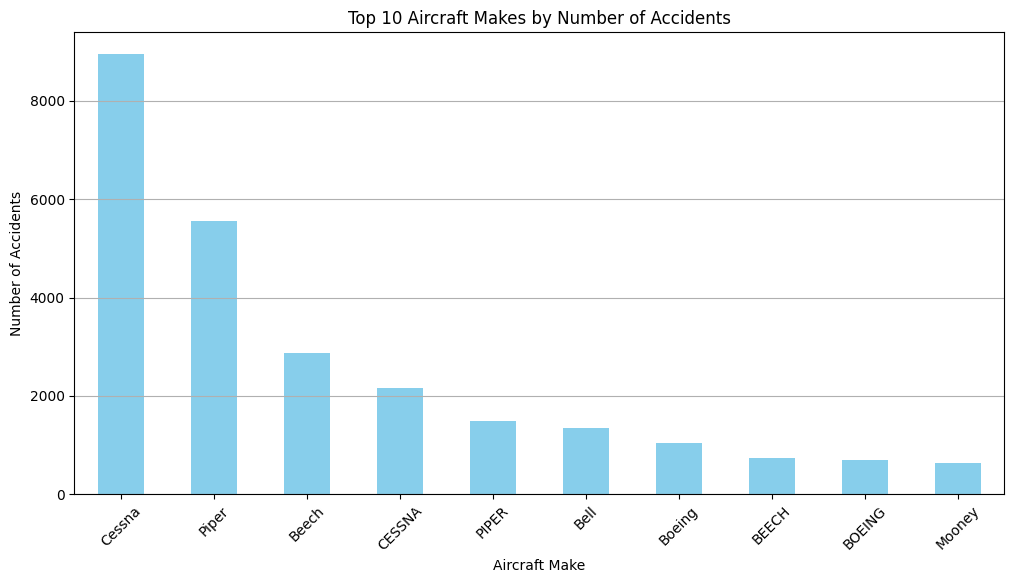

In [315]:
# Number of accidents per aircraft make
aircraft_accidents = df['Make'].value_counts()

plt.figure(figsize=(12,6))
aircraft_accidents.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

On top 10 average fatalities by aircraft make TUPOLEV tops the list with over 40 fatalities.VIKING AIR LIMITED,AVIOCAR CASA,SUKHOI,ANTONOV,JETSTREAM,EMBRAER AIRCRAFT,AIRVAN,M7AERO,ATR followed with VIKING AIR LIMITED having over 20 fatalities and the rest below 20 fatalities.

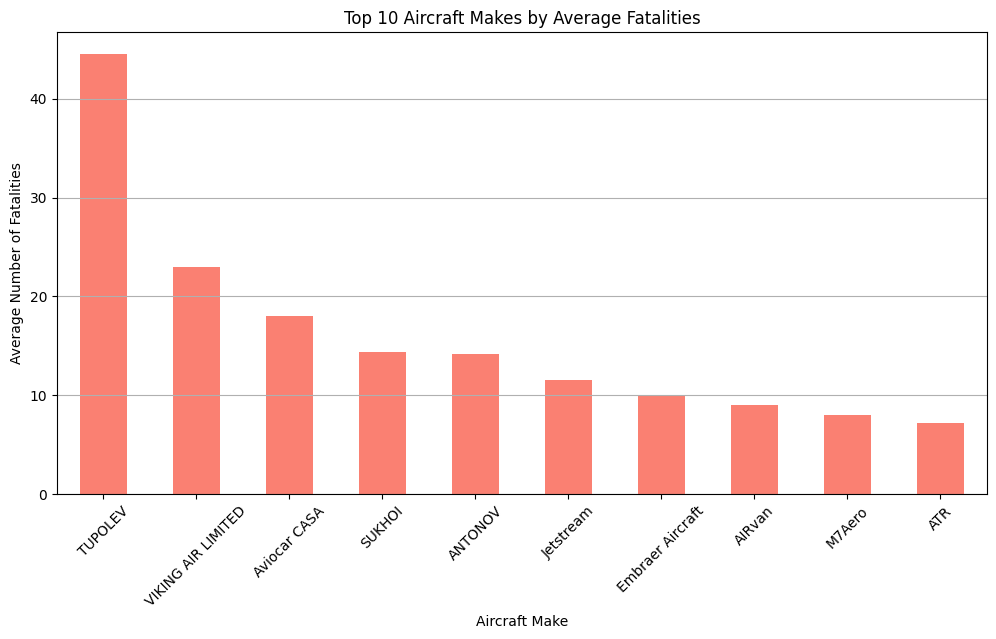

In [316]:
# Average fatalities by Make
fatalities = df.groupby('Make')['Total.Fatal.Injuries'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
fatalities.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Makes by Average Fatalities')
plt.ylabel('Average Number of Fatalities')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

visual meterological conditions (good weather)had the highest number of accidents followed by Instrument Meteorological Conditions (poor visibility,bad weather).

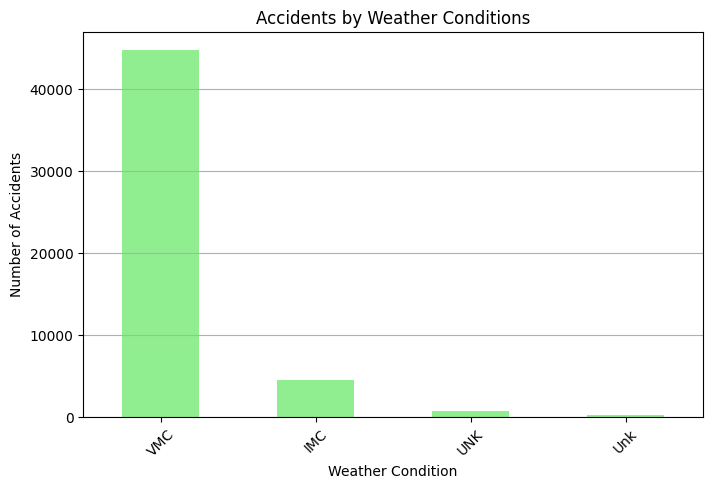

In [317]:
# Number of accidents under different weather conditions
weather_accidents = df['Weather.Condition'].value_counts()

plt.figure(figsize=(8,5))
weather_accidents.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

A significant number of accidents takes place during the take off phase of flights.

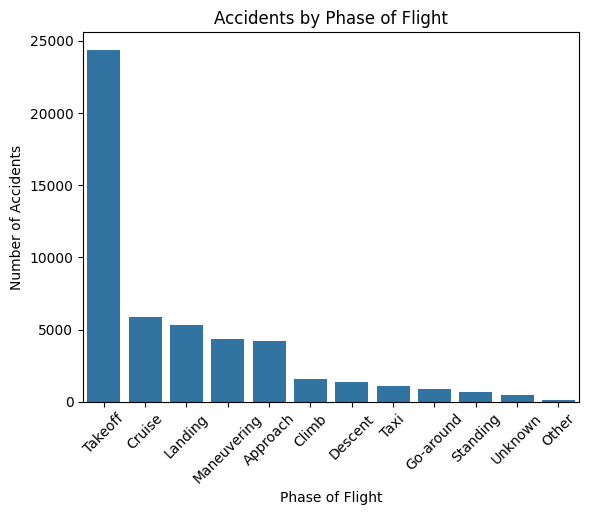

In [318]:
#number of accidents per phase of flights
sns.barplot(x=phase_accidents.index, y=phase_accidents.values)
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.show()